In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [3]:
#reading files
#combined_test=pd.read_csv('combined_test.csv')
combined_train=pd.read_csv('aman_data.csv')

In [4]:
#removing the columns with more than 75% nan values
train_drop = combined_train.dropna(thresh=combined_train.shape[0]*0.75, axis=1)
test_drop = combined_test.dropna(thresh=combined_test.shape[0]*0.75, axis=1)

In [5]:
#addig the malware status column back to the df
train_drop['malware_status']=combined_train['malware_status']

In [6]:
#imputing the missing values with mode 
train_drop_after_mode = train_drop.fillna(train_drop.mode())

In [7]:
#applying data encoding 
train_drop_mode_encoded=train_drop_after_mode.apply(le.fit_transform)
train_drop_mode_encoded

,Unnamed: 0,disk_type,firmware_version_id,number_of_charges_for_battery,device_family,av_status,firmware_manufacturer_id,install_type_name,mdc2_form_factor,edition,...,display_resolution_horizontal,auto_update_opt,virtual_dev_status,sku_edition,security_product_name,firewall,os_build_lab,ui_locale_identifier,os_version,malware_status
0,0,1,21243,29256,1,15737,69,6,2,16,...,1076,2,0,6,4,1,257,25,0,0
1,1,0,13429,29257,1,15737,356,7,8,2,...,564,2,0,4,4,1,610,92,36,0
2,2,0,12643,0,1,15737,182,6,1,2,...,1076,2,0,4,4,1,257,57,0,1
3,3,1,25008,0,1,15737,356,2,8,16,...,564,2,0,6,4,1,257,25,0,1
4,4,0,39075,0,1,18460,302,6,8,5,...,564,5,0,4,4,1,243,25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,99995,0,15749,0,1,15737,356,7,8,5,...,564,5,0,4,4,1,247,28,0,1
4999996,99996,0,19933,0,1,18460,300,3,8,5,...,564,3,0,4,4,1,239,29,0,0
4999997,99997,0,19914,0,1,18460,300,2,8,16,...,564,5,0,6,4,1,0,25,0,0
4999998,99998,1,38926,0,1,15737,302,8,8,5,...,1076,2,0,4,4,1,257,25,0,1


In [8]:
#finding correlation values 
cor_val=train_drop_mode_encoded.corr()

In [9]:
#finding correlation values of malware status with each column
cor_value_malware = cor_val.iloc[: , -1]
xx=cor_value_malware.sort_values()
type(xx)
#print(xx.to_markdown)
df_xx = pd.DataFrame(xx)
type(df_xx)

df_xx.to_csv('cor_values.csv')

In [10]:
del train_drop_mode_encoded['Unnamed: 0']

In [11]:
train_drop_mode_encoded.columns

Index(['disk_type', 'firmware_version_id', 'number_of_charges_for_battery',
       'device_family', 'av_status', 'firmware_manufacturer_id',
       'install_type_name', 'mdc2_form_factor', 'edition', 'sku',
       'diagonal_display_size', 'os_type_status', 'core_count_processer',
       'display_resolution_vertical', 'os_suite', 'power_profile',
       'ram_capacity', 'av_prod_enabled', 'chassis_type', 'machine_version',
       'has_optical_drive', 'city_id', 'av_sig_version', 'state_name',
       'model_id', 'machine_id', 'flight_ring', 'is_protected', 'name_id',
       'geo_id', 'activation_channel', 'display_resolution_horizontal',
       'auto_update_opt', 'virtual_dev_status', 'sku_edition',
       'security_product_name', 'firewall', 'os_build_lab',
       'ui_locale_identifier', 'os_version', 'malware_status'],
      dtype='object')

In [21]:
train_drop_mode_encoded.shape

(5000000, 41)

In [20]:
#train_drop_mode_encoded.sample(n=100000).to_csv('df.csv')


(80000, 40)
(20000, 40)
(80000,)
(20000,)
0.59175
[[5707 4158]
 [4007 6128]]
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      9865
           1       0.60      0.60      0.60     10135

    accuracy                           0.59     20000
   macro avg       0.59      0.59      0.59     20000
weighted avg       0.59      0.59      0.59     20000

0.5915736392957616


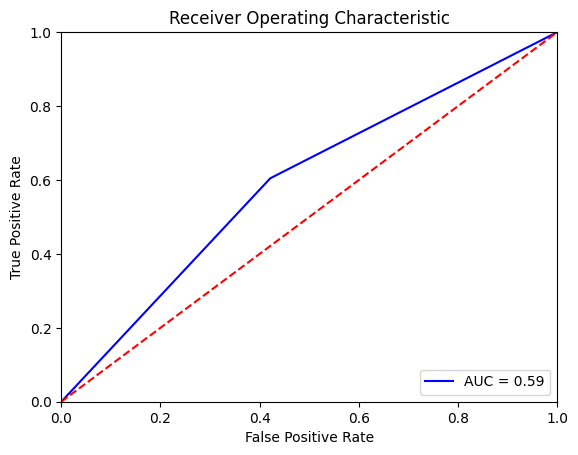

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['malware_status'], axis=1), df['malware_status'], test_size=0.2, random_state=42)

#display the shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#build the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predict the model
y_pred = model.predict(X_test)

#display the accuracy score
print(accuracy_score(y_test, y_pred))

#display the confusion matrix
print(confusion_matrix(y_test, y_pred))

#display the classification report
print(classification_report(y_test, y_pred))

#display the roc_auc_score
print(roc_auc_score(y_test, y_pred))

#display the roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(80000, 40)
(20000, 40)
(80000,)
(20000,)
1.0
[[40012     0]
 [    0 39988]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40012
           1       1.00      1.00      1.00     39988

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

1.0


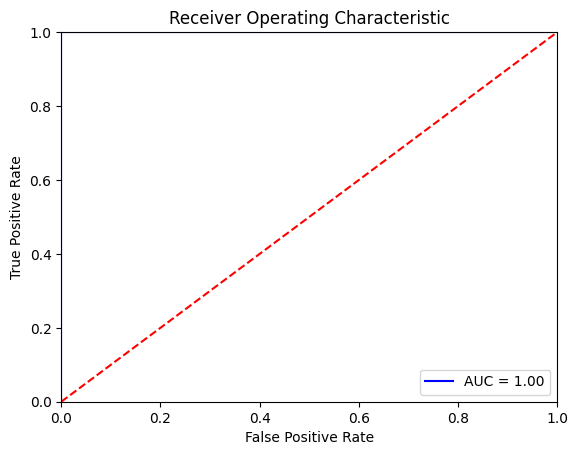

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['malware_status'], axis=1), df['malware_status'], test_size=0.2, random_state=42)

#display the shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#build the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42,)
model.fit(X_train, y_train)

#predict the model
y_pred = model.predict(X_train)

#display the accuracy score
print(accuracy_score(y_train, y_pred))

#display the confusion matrix
print(confusion_matrix(y_train, y_pred))

#display the classification report
print(classification_report(y_train, y_pred))

#display the roc_auc_score
print(roc_auc_score(y_train, y_pred))

#display the roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()